# Logistic Regression(Assignment)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

## Load the dataset 

In [2]:
x = pd.read_csv('Titanic_train.csv')
y = pd.read_csv('Titanic_test.csv')

## Data Preprocessing

Preprocessing the 'train' data

In [3]:
x.shape

(891, 12)

In [4]:
x.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
x.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
x.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
x.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Removing unnecessary columns

In [8]:
x = x[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 
         #'SibSp','Parch', 
         'Ticket', 
         #'Fare', 
         'Cabin', 'Embarked']].copy()

### Checking for duplicates

In [9]:
x.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [10]:
x.loc[x.duplicated()] #returns duplicated rows

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Cabin,Embarked


NO duplicated values

### Checking for Null values

In [11]:
x.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
Ticket           0
Cabin          687
Embarked         2
dtype: int64

In [12]:
x = x[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket',
    #'Cabin', #not including cabin as it has too many NULL values
    'Embarked']].copy()

### Filling NULL values

In [13]:
x['Embarked'].mode
mode = x['Embarked'].mode()[0]

In [14]:
x['Age'].mean()
mean = round(x['Age'].mean())

In [15]:
x.fillna({'Embarked' : mode,
        'Age' : mean}, inplace = True)

In [16]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   Ticket       891 non-null    object 
 7   Embarked     891 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 55.8+ KB


Preprocessing the 'test' data

In [17]:
y.shape

(418, 11)

In [18]:
y.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
y.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
y.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [21]:
y.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Removing unnecessary columns

In [22]:
y = y[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 
   #'SibSp', 'Parch',
    'Ticket', 
   #'Fare', 
   'Cabin', 'Embarked']].copy()

### Checking for duplicates

In [23]:
y.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 418, dtype: bool

In [24]:
y.loc[y.duplicated()] #returns duplicated rows

,PassengerId,Pclass,Name,Sex,Age,Ticket,Cabin,Embarked


NO duplicate values

### Checking for NULL values

In [25]:
y.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
Ticket           0
Cabin          327
Embarked         0
dtype: int64

In [26]:
y = y[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket', 
   #'Cabin', #removing cabin as it has too many NULL values
    'Embarked']].copy()

### Filling NULL values

In [27]:
y['Age'].mean()
mean = round(y['Age'].mean())

In [28]:
y.fillna({'Age' : mean}, inplace = True)

In [29]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   Ticket       418 non-null    object 
 6   Embarked     418 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 23.0+ KB


## Visualizations (Feature Understanding)

'Train' data

C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

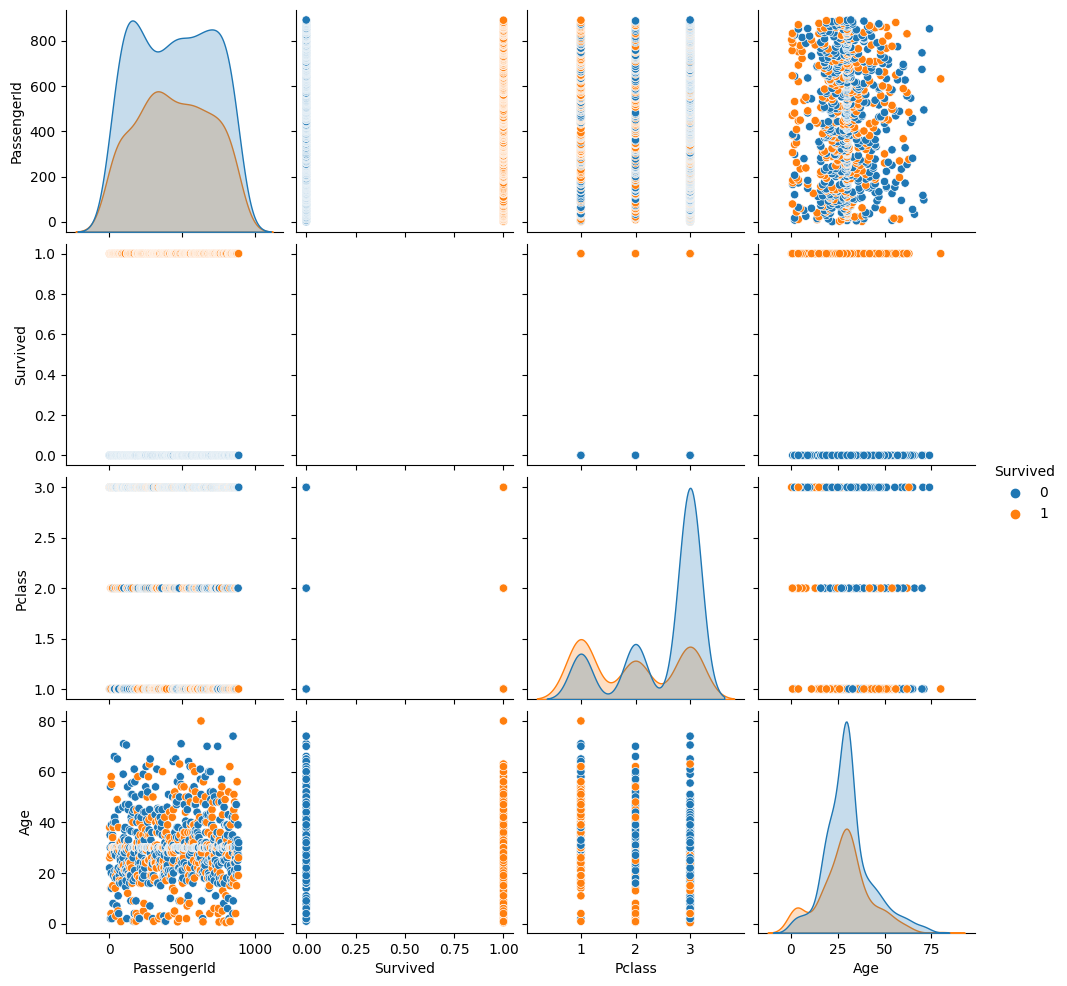

In [30]:
sns.pairplot(x, vars = ['PassengerId', 'Survived', 'Pclass', 'Age'],
            hue = 'Survived')
plt.show()

<Axes: >

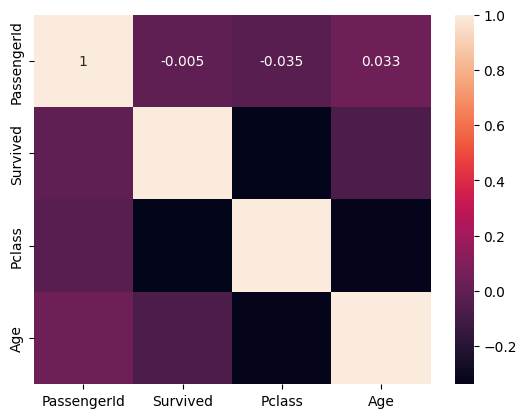

In [31]:
#Finding correlation
correlation = x[['PassengerId', 'Survived', 'Pclass', 'Age']].corr()

sns.heatmap(correlation, annot = True)

'Test' data

C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

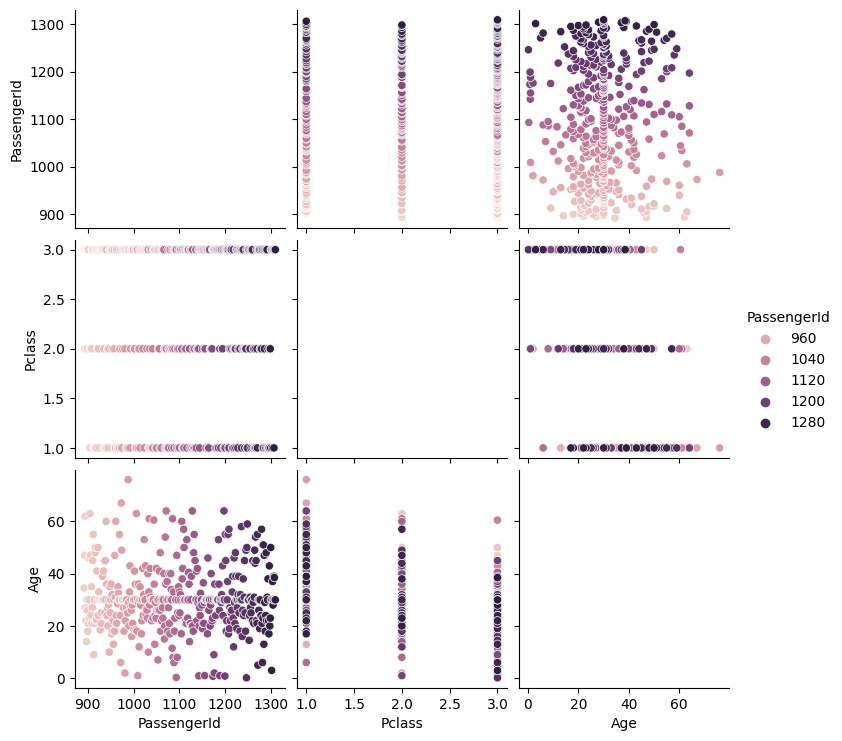

In [32]:
sns.pairplot(y, vars = ['PassengerId', 'Pclass', 'Age'],
            hue = 'PassengerId')
plt.show()

In [33]:
x[[#'PassengerId', 
    #'Survived', 
    'Pclass', 
    #'Name', 
    'Sex', 
    'Age', 
    #'Ticket','Embarked'
    ]]

,Pclass,Sex,Age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0
...,...,...,...
886,2,male,27.0
887,1,female,19.0
888,3,female,30.0
889,1,male,26.0


In [34]:
from sklearn.preprocessing import LabelEncoder

# Create encoder and fit
le = LabelEncoder()
x['Sex'] = le.fit_transform(x['Sex'])

In [35]:
x.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,373450,S


### Split the data

In [36]:
x.shape

(891, 8)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X = x.drop(columns = ['PassengerId', 'Survived', 'Name', 'Ticket', 'Embarked'])
Y = x['Survived']

In [39]:
X.head(3)

,Pclass,Sex,Age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0


In [40]:
Y.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

In [41]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((712, 3), (179, 3), (712,), (179,))

### Build Model

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [43]:
model.fit(X_train,Y_train)

LogisticRegression()

### Evaluate the model

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, f1_score

In [45]:
#Training metrics
Yhat_train = model.predict(X_train)
cm = confusion_matrix(Y_train,Yhat_train)
print(cm)

[[381  63]
 [ 85 183]]


In [46]:
print(classification_report(Y_train,Yhat_train))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       444
           1       0.74      0.68      0.71       268

    accuracy                           0.79       712
   macro avg       0.78      0.77      0.77       712
weighted avg       0.79      0.79      0.79       712



In [47]:
fpr,tpr, thresh = roc_curve(Y_train, Yhat_train)
auc = roc_auc_score(Y_train, Yhat_train)
auc

0.7704719645018153

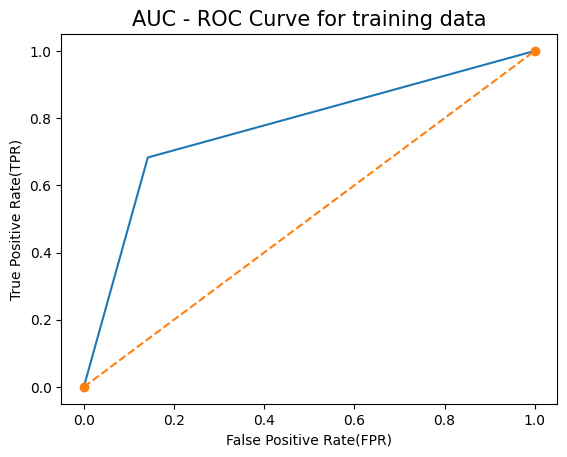

In [48]:
plt.title('AUC - ROC Curve for training data', fontsize=15)
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], 'o--')
plt.show()

In [49]:
score = f1_score(Y_train, Yhat_train)
print("F1 Score:", score)

F1 Score: 0.7120622568093385


In [50]:
#Testing metrics
Yhat_test = model.predict(X_test)
cm =  confusion_matrix(Y_test,Yhat_test)
print(cm)

[[91 14]
 [20 54]]


In [51]:
print(classification_report(Y_test,Yhat_test))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [52]:
fpr,tpr, thresh = roc_curve(Y_test, Yhat_test)
auc = roc_auc_score(Y_test, Yhat_test)
auc

0.7981981981981983

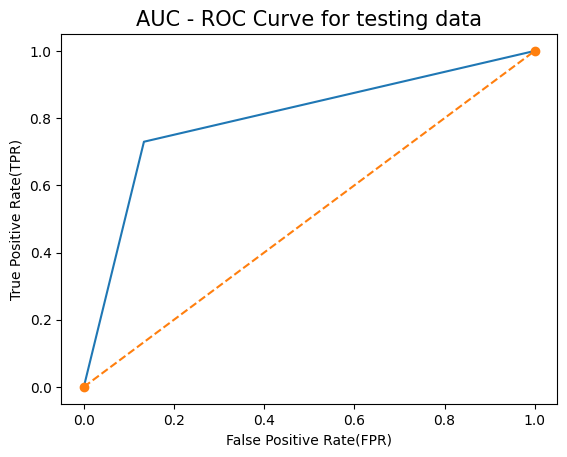

In [53]:
plt.title('AUC - ROC Curve for testing data', fontsize=15)
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], 'o--')
plt.show()

In [54]:
score = f1_score(Y_test, Yhat_test)
print("F1 Score:", score)

F1 Score: 0.7605633802816901


## Dump the model

In [55]:
import pickle

In [56]:
pickle.dump(model, open('clf.pkl','wb'))